In [1]:
#pip install cryptocompare

In [1]:
import cryptocompare
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Get the API key from the Quantra file located inside the data_modules folder
# cryptocompare_API_key = 'Insert_here_your_api_key'

# Set the API key in the cryptocompare object
# cryptocompare.cryptocompare._set_api_key_parameter(cryptocompare_API_key)

# print("API Key set!")

In [2]:
# Fetch the raw ticker list
raw_ticker_data = cryptocompare.get_coin_list()

# Convert the raw data from dictionary format to DataFrame
all_tickers = pd.DataFrame.from_dict(raw_ticker_data).T

# Preview the first 6 columns and the last 5 rows of the ticker list
all_tickers.iloc[:, :5].tail()

,Id,Url,ImageUrl,ContentCreatedOn,Name
IDXS,953208,/coins/idxs/overview,/media/44082100/idxs.png,1682671667,IDXS
FIDLE,953214,/coins/fidle/overview,/media/44082103/fidle.png,1682676916,FIDLE
XACT,953216,/coins/xact/overview,/media/44082104/xact.png,1682687505,XACT
FAST,953088,/coins/fast/overview,/media/44082022/fast.png,1680276887,FAST
DOGECEO,953219,/coins/dogeceo/overview,/media/44082105/dogeceo.png,1682692672,DOGECEO


In [15]:
# Define the ticker symbol and other details
ticker_symbol = 'BTC'
currency = 'USD'
limit_value = 2000  # max value 
exchange_name = 'CCCAGG'
data_before_timestamp = datetime(2023, 4, 21, 0, 0)

In [16]:

# For daily data
# cryptocompare.get_historical_price_day(ticker_symbol, currency, limit=limit_value, exchange=exchange_name, toTs=data_before_timestamp)

# For hourly data
# cryptocompare.get_historical_price_hour(ticker_symbol, currency, limit=limit_value, exchange=exchange_name, toTs=data_before_timestamp)

# For minute data
# cryptocompare.get_historical_price_minute(ticker_symbol, currency, limit=limit_value, exchange=exchange_name, toTs=data_before_timestamp)


# Fetch the raw price data
raw_price_data = \
    cryptocompare.get_historical_price_hour(
        ticker_symbol,
        currency,
        limit=limit_value,
        exchange=exchange_name,
        toTs=data_before_timestamp
    )

# Convert the raw price data into a DataFrame
hourly_price_data = pd.DataFrame.from_dict(raw_price_data)

# Set the time columns as index and convert it to datetime
hourly_price_data.set_index("time", inplace=True)
hourly_price_data.index = pd.to_datetime(hourly_price_data.index, unit='s')
hourly_price_data['datetimes'] = hourly_price_data.index
hourly_price_data['datetimes'] = hourly_price_data['datetimes'].dt.strftime(
    '%Y-%m-%d')

# Preview the last 5 values of the the first 7 columns of the DataFrame
hourly_price_data.iloc[:, :6].tail(5)

,high,low,open,volumefrom,volumeto,close
time,,,,,,
2023-04-21 00:00:00,28360.43,28093.86,28245.06,2641.54,74544146.47,28289.74
2023-04-21 01:00:00,28318.64,28203.86,28289.74,668.24,18874235.76,28207.97
2023-04-21 02:00:00,28252.80,28147.89,28207.97,810.58,22867734.55,28250.83
2023-04-21 03:00:00,28338.84,28244.83,28250.83,532.30,15061843.00,28326.99
2023-04-21 04:00:00,28349.82,28237.47,28326.99,471.60,13346215.01,28244.33


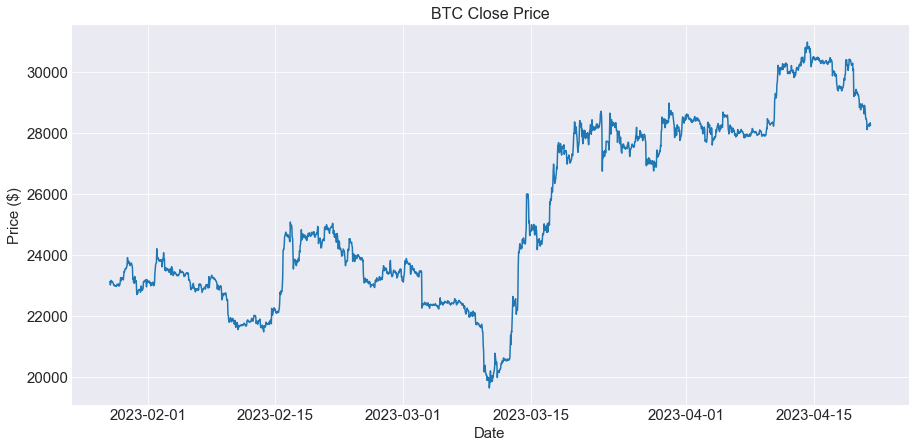

In [17]:
# Plot the close price
plt.figure(figsize=(15, 7))
plt.plot(hourly_price_data.close)

plt.title('BTC Close Price', fontsize=16)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price ($)', fontsize=15)
plt.tick_params(axis='both', labelsize=15)

plt.show()

In [14]:
# save data

print(type(hourly_price_data))

print(hourly_price_data)

path = r"C:\Users\ee527\Desktop\ELEN-E6889_Crypto_Prediction_With_Tweet\Stream_Preprocessing\dataset\bitcoin_hour.csv"

# 將 DataFrame 寫入 CSV 檔案
hourly_price_data.to_csv(path, index=True)


<class 'pandas.core.frame.DataFrame'>
                        high      low     open  volumefrom     volumeto  \
time                                                                      
2023-01-27 20:00:00  1621.71  1593.44  1610.06    39208.49  63089508.33   
2023-01-27 21:00:00  1606.00  1596.97  1599.33    13756.91  22030299.97   
2023-01-27 22:00:00  1599.96  1589.40  1599.41    12836.92  20458464.90   
2023-01-27 23:00:00  1600.01  1593.19  1593.28     9557.23  15267088.70   
2023-01-28 00:00:00  1606.66  1594.52  1597.86    15131.13  24225263.73   
...                      ...      ...      ...         ...          ...   
2023-04-21 00:00:00  1956.00  1935.52  1943.17    12866.60  25048810.96   
2023-04-21 01:00:00  1950.45  1940.42  1947.88     6710.14  13054072.36   
2023-04-21 02:00:00  1945.46  1937.89  1942.00     5460.91  10606700.18   
2023-04-21 03:00:00  1949.78  1944.88  1945.45     4285.60   8343577.51   
2023-04-21 04:00:00  1947.87  1938.88  1946.31     3978.16   7